# Natural Language Processing Introduction

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Regular Expression
Pattern to cleaning or regularizing text

In [2]:
# library
import re

## NLTK library

In [3]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import regexp_tokenize

## Data Visualization with matplotlib (Charting)

['This', 'is', 'an', 'example', 'word', 'that', 'is', 'pretty', 'cool', 'tool', 'to', 'do', 'NLP', '!', '....']


(array([1., 5., 0., 1., 0., 6., 0., 0., 1., 1.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

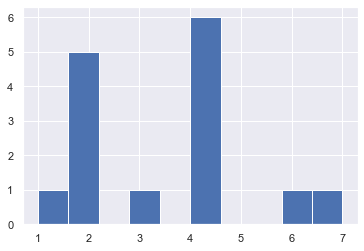

In [4]:
words = word_tokenize('This is an example word that is pretty cool tool to do NLP!....')
print(words)

len_word = [len(w) for w in words]

sns.set()
plt.hist(len_word)

## Named entity recognition (NER) with SpaCy

In [5]:
import spacy

In [6]:
ner = spacy.load('en_core_web_sm')

doc = ner('The criminal inquiry comes at a difficult time for Uber which has faced criticism on many fronts. It is currently fighting a lawsuit from Google-backed self-driving car firm Waymo.Despite all the current hype about the rise of voice-assisted devices using Alexa and Siri, linguistics researcher Rachael Tatman found people complaining on social media that the technology still doesn’t understand them.')

doc.ents

(Uber, Google, Waymo, Alexa, Siri, Rachael Tatman)

In [7]:
for ent in doc.ents:
    print(ent.label_, ent.text)


PERSON Uber
ORG Google
PRODUCT Waymo
ORG Alexa
ORG Siri
PERSON Rachael Tatman


## Articles Dataset

In [8]:
articles = pd.read_csv('data/txt/News articles/articles.txt', header=None, sep=';', names=['Article Title'])

articles.shape

(104, 1)

In [9]:
articles.head()

,Article Title
0,Image copyright EPA Image caption Uber has bee...
1,Ride-sharing firm Uber is facing a criminal in...
2,The scrutiny has started because the firm is a...
3,"The software, called ""greyball"", helped it ide..."
4,A spokesman for Uber declined to comment on th...


In [10]:
# preprocessing
articles['cleaned'] = articles['Article Title'].str.replace('[^a-zA-Z]',' ')
articles['cleaned'] = articles['cleaned'].str.lower()

articles['cleaned'].head()

0    image copyright epa image caption uber has bee...
1    ride sharing firm uber is facing a criminal in...
2    the scrutiny has started because the firm is a...
3    the software  called  greyball   helped it ide...
4    a spokesman for uber declined to comment on th...
Name: cleaned, dtype: object

In [11]:
# library
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
article_tv = TfidfVectorizer(stop_words='english')

article_transform = article_tv.fit_transform(articles['cleaned'])

In [13]:
article_transform

<104x1293 sparse matrix of type '<class 'numpy.float64'>'
	with 2325 stored elements in Compressed Sparse Row format>

In [14]:
# most common words
article_matrix = pd.DataFrame(article_transform.toarray(), \
                             columns=article_tv.get_feature_names())\
                                 .add_prefix('tv_')

article_matrix.sum().sort_values(ascending=False).head(10)

tv_advertisement    5.392186
tv_story            5.392186
tv_main             5.392186
tv_reading          5.392186
tv_continue         5.335897
tv_said             3.452984
tv_news             2.597528
tv_robots           2.407691
tv_fake             2.161088
tv_population       1.879156
dtype: float64